# Questions séance 6 février 2023

## numpy

Le code suivant calcule un pivot de Gauss. Toutes les boucles sont écrites en python. Saurez-vous remplacer une boucle par l'addition de deux vecteurs ?

In [1]:
import numpy

def pivot_gauss(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i-1] == 0:
            j0 += 1
        for j in range(j0, m.shape[0]):
            coef = - m[j, i-1] / m[i-1, i-1]
            for k in range(i-1, m.shape[1]):
                m[j, k] += coef * m[i-1, k]
    return m


m = numpy.random.rand(4, 4)
piv = pivot_gauss(m)
piv * (numpy.abs(piv) > 1e-10)

array([[ 0.2870116 ,  0.23255199,  0.99778275,  0.3723715 ],
       [ 0.        ,  0.25707083,  0.03938638,  0.24588584],
       [ 0.        ,  0.        , -0.44074443, -0.02428594],
       [ 0.        ,  0.        ,  0.        , -0.14912591]])

La correction est ici [Pivot de gauss avec numpy](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/pivot_gauss.html).

## pandas

On récupère la distribution d'énergie depuis open.data.gouv.fr [Demandes de valeurs foncières](https://www.data.gouv.fr/fr/datasets/consommation-annuelle-delectricite-et-gaz-par-departement-et-par-secteur-dactivite/#resources). On doit calculer la part de la consommation résidentielle pour l'année 2021 rapportée à la consommation totale pour chaque département, opérateur et filière.

In [2]:
columns = [
    "annee",  # filtre
    "operateur",  # groupe
    "filiere",  # groupe
    "code_departement",  # groupe
    "libelle_departement",  # groupe
    "consoa",  # somme, consommation agricuture
    "consoi",  # somme, consommation industrie
    "consot",  # somme, consommation tertiaire
    "consor",  # somme, consommation résidentielle
    "consona",  # somme, consommation inconnue
    "consototale",  # somme, consommation totale
]

In [3]:
import pandas
df = pandas.read_csv("https://www.data.gouv.fr/fr/datasets/r/e455db41-28c2-419d-bdf1-d44635fdc97e", sep=";")
df.head(2).T

,0,1
operateur,Centrale électrique Vonderscheer de Ville,Coopérative d'électricité de Saint Martin de L...
annee,2011,2011
filiere,Electricité,Electricité
consoa,0.0,1414.68
pdla,0,22
nombre_maille_secretisees_a,0,0
indquala,0.0,1.0
consoi,271.0,15865.01
pdli,4,66
nombre_maille_secretisees_i,0,0


In [4]:
gr = df[df.annee == 2021][keys + ["consor", "consototale"]].groupby(keys).sum()
gr["ratio"] = gr["consor"] / gr["consototale"]
gr

consor  \
libelle_departement filiere     operateur                              
Ain                 Electricité Enedis                  1.827582e+06   
                                RTE                     0.000000e+00   
                                Régie Services Energie  3.518367e+04   
                    Gaz         GRDF                    1.117960e+06   
                                GRT Gaz                 0.000000e+00   
...                                                              ...   
Yvelines            Electricité Gazelec de Péronne      0.000000e+00   
                                RTE                     0.000000e+00   
                                SICAE ELY               6.668413e+04   
                    Gaz         GRDF                    4.521896e+06   
                                GRT Gaz                 0.000000e+00   

                                                         consototale     ratio  
libelle_departement filiere     operateur                                       
Ain                 Electricité Enedis                  4.202821e+06  0.434847  
                                RTE                     1.969394e+06  0.000000  
                                Régie Services Energie  6.491954e+04  0.541958  
                    Gaz         GRDF                    2.821584e+06  0.396217  
                                GRT Gaz                 8.626914e+05  0.000000  
...                                                              ...       ...  
Yvelines            Electricité Gazelec de Péronne      4.330700e+01  0.000000  
                                RTE                     1.269762e+06  0.000000  
                                SICAE ELY               1.105667e+05  0.603112  
                    Gaz         GRDF                    7.957519e+06  0.568255  
                                GRT Gaz                 1.462693e+06  0.000000  

[569 rows x 3 columns]

## un problème docteur

On récupère un fichier contenant des données agrégées par année. Si rien ne vous paraît suspect, tant mieux, sinon il faudra dire pourquoi.

In [6]:
import pandas

df = pandas.read_csv("seance_6_fevrier.csv")
agg = df.groupby("annee").sum()
agg

,conso
annee,
2010,5818.296372
2011,6042.792132
2012,5956.360936
2013,5856.246799
2014,6123.335790
2015,2886.124028
2016,5832.216522
2017,6126.836683
2018,6458.576942


Avec un dessin, c'est plus clair. 2015 pose problème.

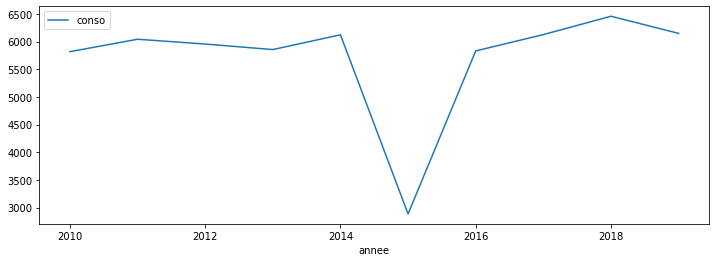

In [7]:
agg.plot(figsize=(12, 4));

In [8]:
df[df.annee == 2015]

,annee,conso
5,2015,NaN
9,2015,5.683071
11,2015,NaN
18,2015,NaN
33,2015,2.433315
...,...,...
9980,2015,6.430573
9982,2015,1.900968
9985,2015,NaN
9989,2015,5.669566


Il semble y avoir des valeurs manquantes. Vérifions.

In [9]:
import numpy
df["miss"] = df.conso.isna().astype(numpy.int64)

In [10]:
df.groupby("annee").sum()

,conso,miss
annee,,
2010,5818.296372,0
2011,6042.792132,0
2012,5956.360936,0
2013,5856.246799,0
2014,6123.335790,0
2015,2886.124028,519
2016,5832.216522,0
2017,6126.836683,0
2018,6458.576942,0


L'année 2015 contient des valeurs manquantes, les autres années non.